# Median of means LASSO with the *outliers_importance* coefficient for outlier detection in dataset

The aim of this notebook is to compare the  performances of the **classical LASSO** estimator to the one of the **MOM LASSO** estimators with both fixed and random choice of blocks. In particular, we want to test the **robustess** properties of the two estimators and the ability of the MOM estimator with random choice of blocks to detect outliers.

Here outliers are **bad data**  (terminolgogy borrowed from Huber and Ronchetti's book on robust statictics) these are  data which have nothing to do with the signal we want to estimate.



===================================
$\newcommand{\inr}[1]{\bigl< #1 \bigr>}$
$\newcommand{\norm}[1]{\left\|#1\right\|}$
$\newcommand{\to}{\rightarrow}$
$\newcommand{\hM}{\hat f}$
$\newcommand{\hrho}{\hat \rho}$
$\newcommand{\hmu}{\boldsymbol{\hat \mu}}$
$\newcommand{\htheta}{{\boldsymbol{\hat \theta}}}$
$\newcommand{\tildemu}{{\boldsymbol{\tilde \mu}}}$
$\DeclareMathOperator*{\argmax}{argmax}$
$\DeclareMathOperator*{\argmin}{argmin}$
$\DeclareMathOperator*{\supp}{Supp}$
$\DeclareMathOperator{\limInf}{liminf}$
$\DeclareMathOperator{\limSup}{limsup}$
$\DeclareMathOperator{\pen}{pen}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\Span}{span}$
$\DeclareMathOperator{\conv}{conv}$
$\DeclareMathOperator*{\rank}{rank}$
$\newcommand{\blue}[1]{{\color{blue} #1}}$
$\newcommand{\green}[1]{{\color{green} #1}}$
$\newcommand{\red}[1]{{\color{red} #1}}$
$\newcommand \cA{{\cal A}}$
$\newcommand \cB{{\cal B}}$
$\newcommand \cC{{\cal C}}$
$\newcommand \cD{{\cal D}}$
$\newcommand \cE{{\cal E}}$
$\newcommand \cF{{\cal F}}$
$\newcommand \cG{{\cal G}}$
$\newcommand \cH{{\cal H}}$
$\newcommand \cI{{\cal I}}$
$\newcommand \cJ{{\cal J}}$
$\newcommand \cK{{\cal K}}$
$\newcommand \cL{{\cal L}}$
$\newcommand \cM{{\cal M}}$
$\newcommand \cN{{\cal N}}$
$\newcommand \cO{{\cal O}}$
$\newcommand \cP{{\cal P}}$
$\newcommand \cQ{{\cal Q}}$
$\newcommand \cR{{\cal R}}$
$\newcommand \cS{{\cal S}}$
$\newcommand \cT{{\cal T}}$
$\newcommand \cU{{\cal U}}$
$\newcommand \cV{{\cal V}}$
$\newcommand \cW{{\cal W}}$
$\newcommand \cX{{\cal X}}$
$\newcommand \cY{{\cal Y}}$
$\newcommand \cZ{{\cal Z}}$
$\newcommand \bA{{\mathbb A}}$
$\newcommand \bB{{\mathbb B}}$
$\newcommand \bC{{\mathbb C}}$
$\newcommand \bD{{\mathbb D}}$
$\newcommand \bE{{\mathbb E}}$
$\newcommand \bF{{\mathbb F}}$
$\newcommand \bG{{\mathbb G}}$
$\newcommand \bH{{\mathbb H}}$
$\newcommand \bI{{\mathbb I}}$
$\newcommand \bJ{{\mathbb J}}$
$\newcommand \bK{{\mathbb K}}$
$\newcommand \bL{{\mathbb L}}$
$\newcommand \bM{{\mathbb M}}$
$\newcommand \bN{{\mathbb N}}$
$\newcommand \bO{{\mathbb O}}$
$\newcommand \bP{{\mathbb P}}$
$\newcommand \bQ{{\mathbb Q}}$
$\newcommand \bR{{\mathbb R}}$
$\newcommand \bS{{\mathbb S}}$
$\newcommand \bT{{\mathbb T}}$
$\newcommand \bU{{\mathbb U}}$
$\newcommand \bV{{\mathbb V}}$
$\newcommand \bW{{\mathbb W}}$
$\newcommand \bX{{\mathbb X}}$
$\newcommand \bY{{\mathbb Y}}$
$\newcommand \bZ{{\mathbb Z}}$

$\newcommand \fA{{\mathfrak A}}$
$\newcommand \fB{{\mathfrak B}}$
$\newcommand \fC{{\mathfrak C}}$
$\newcommand \fD{{\mathfrak D}}$
$\newcommand \fE{{\mathfrak E}}$
$\newcommand \fF{{\mathfrak F}}$
$\newcommand \fG{{\mathfrak G}}$
$\newcommand \fH{{\mathfrak H}}$
$\newcommand \fI{{\mathfrak I}}$
$\newcommand \fJ{{\mathfrak J}}$
$\newcommand \fK{{\mathfrak K}}$
$\newcommand \fL{{\mathfrak L}}$
$\newcommand \fM{{\mathfrak M}}$
$\newcommand \fN{{\mathfrak N}}$
$\newcommand \fO{{\mathfrak O}}$
$\newcommand \fP{{\mathfrak P}}$
$\newcommand \fQ{{\mathfrak Q}}$
$\newcommand \fR{{\mathfrak R}}$
$\newcommand \fS{{\mathfrak S}}$
$\newcommand \fT{{\mathfrak T}}$
$\newcommand \fU{{\mathfrak U}}$
$\newcommand \fV{{\mathfrak V}}$
$\newcommand \fW{{\mathfrak W}}$
$\newcommand \fX{{\mathfrak X}}$
$\newcommand \fY{{\mathfrak Y}}$
$\newcommand \fZ{{\mathfrak Z}}$
$\newcommand{\vmu}{{\boldsymbol{\mu}}}$
$\newcommand{\vf}{{\mathbf{f}}}$
$\newcommand{\vtheta}{{\boldsymbol{\theta}}}$
$\newcommand{\vbeta}{{\boldsymbol{\beta}}}$
$\newcommand{\vc}{{\boldsymbol{1}}}$
$\newcommand{\vlambda}{{\boldsymbol{\lambda}}}$
$\newcommand{\vv}{{\boldsymbol{v}}}$
$\newcommand{\vh}{{\boldsymbol{h}}}$
$\newcommand{\ve}{{\boldsymbol{e}}}$
$\newcommand{\vzero}{{\boldsymbol{0}}}$
$\newcommand{\vx}{{\boldsymbol{x}}}$
$\newcommand{\vz}{{\boldsymbol{z}}}$
$\newcommand{\vu}{{\boldsymbol{u}}}$
$\newcommand{\vw}{{\boldsymbol{w}}}$
$\newcommand{\vb}{{\boldsymbol{b}}}$
$\newcommand{\vy}{\mathbf{y}}$
$\newcommand{\vxi}{{\boldsymbol{\xi}}}$
$\newcommand{\vg}{{\boldsymbol{g}}}$
$\newcommand{\vI}{{\boldsymbol{I}}}$
$\newcommand{\vdelta}{{\boldsymbol{\delta}}}$

In [53]:
import nbimporter
import MOM_LASSO as MOM_LASSO
import MOM_CV as MOM_CV

import numpy as np
from numpy.random import multivariate_normal, randn
from numpy.linalg import norm
from numpy import sqrt
from scipy.linalg import svd
from scipy.linalg.special_matrices import toeplitz
from scipy import linalg
import matplotlib.pylab as plt
import time
from sklearn.utils import shuffle

np.set_printoptions(precision=2)
%matplotlib inline

In [54]:
def median_index(vector):
    med = np.median(vector)
    return np.nanargmin(np.abs(vector-med))

def random_block(X, y, x, x_prime, K):
    vect_means = []
    N = y.size
    li = np.arange(N)
    np.random.shuffle(li)
    for k in np.arange(0, K):
        ind = li[k*int(N/K): (k+1)*int(N/K)]
        Xk, yk = X[ind], y[ind]
        excess_loss_k = linalg.norm(Xk.dot(x) - yk) ** 2 - linalg.norm(Xk.dot(x_prime) - yk) ** 2
        vect_means.append(excess_loss_k)
    idx_med = median_index(vect_means)
    ind = li[idx_med*int(N/K): (idx_med+1)*int(N/K)]
    #print(idx_med)
    return X[ind], y[ind], ind

In [55]:
## MOM ADMM RANDOM BLOCKS
def MOM_ADMM_RANDOM_BLOCKS(X, y, beta_0, K=3, max_iter=100, lamda = 1):
    dim = X.shape[1]
    x, x_prime = np.matrix([0.0]*dim).T, np.matrix([0.0]*dim).T
    z, z_prime = x, x_prime
    u, u_prime = x, x_prime
    mom_obj_ADMM, mom_error_ADMM = [], []
    rho = 5
    list_ind_selected = []
    print("Lauching MOM-ADMM-RANDOM-BLOCKS solver...")
    for t in range(0, max_iter):
        if (t%100==0):
            print('iter= {}, estimation error MOM ADMM RANDOM BLOCKS = {:3f}'.format(t, norm(beta_0 - x)))
        #descent
        Xk, yk, ind = random_block(X, y, x, x_prime, K)
        x = np.linalg.solve((Xk.T)*Xk + rho*np.identity(dim), Xk.T*yk + rho*z - u)
        z = MOM_LASSO.soft_threshod(x + u/rho, lamda/rho)
        u = u + rho * (x-z)
        list_ind_selected.append(ind)
        #ascent
        Xk, yk, ind = random_block(X, y, x, x_prime, K)
        x_prime = np.linalg.solve((Xk.T)*Xk + rho*np.identity(dim), Xk.T*yk + rho*z_prime - u_prime)
        z_prime = MOM_LASSO.soft_threshod(x_prime + u_prime/rho, lamda/rho)
        u_prime = u_prime + rho * (x_prime-z_prime)
        list_ind_selected.append(ind)

        

        mom_obj_ADMM.append(MOM_LASSO.mom_obj(X, y, x, x_prime, lamda))
        mom_error_ADMM.append(norm(beta_0 - x))
    
    return mom_error_ADMM, mom_obj_ADMM, x, list_ind_selected

In [56]:
np.random.seed(50)
n_features, sparsity = 300, 20
beta_0 = MOM_LASSO.beta_func(n_features, sparsity)
n_samples,  sigma = 200, 1
y, X = MOM_LASSO.data1(n_samples, beta_0,  sigma)
beta_0 = np.matrix(beta_0).T
y = np.matrix(y).T
X = np.matrix(X)
K, max_iter, lamda = 10, 500, 1/sqrt(n_samples)

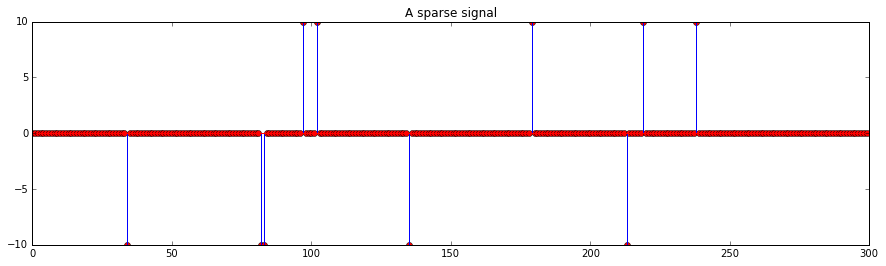

In [57]:
plt.figure(figsize = (15, 4))
plt.stem(beta_0, markerfmt='ro', label='true')
plt.title('A sparse signal')

In [58]:
mom_error_ADMM, mom_obj_ADMM, mom_x_ADMM = MOM_LASSO.MOM_ADMM(X, y,beta_0, K, max_iter, lamda)
mom_error_ADMM_random_blocks, mom_obj_ADMM_random_blocks, mom_x_ADMM_random_blocks, list_ind_selected = MOM_ADMM_RANDOM_BLOCKS(X, y,beta_0, K, max_iter, lamda)

Lauching MOM-ADMM-RANDOM-BLOCKS solver...
iter= 0, estimation error MOM ADMM RANDOM BLOCKS = 31.622783
iter= 100, estimation error MOM ADMM RANDOM BLOCKS = 9.709426
iter= 200, estimation error MOM ADMM RANDOM BLOCKS = 2.228098
iter= 300, estimation error MOM ADMM RANDOM BLOCKS = 0.820793
iter= 400, estimation error MOM ADMM RANDOM BLOCKS = 0.716966


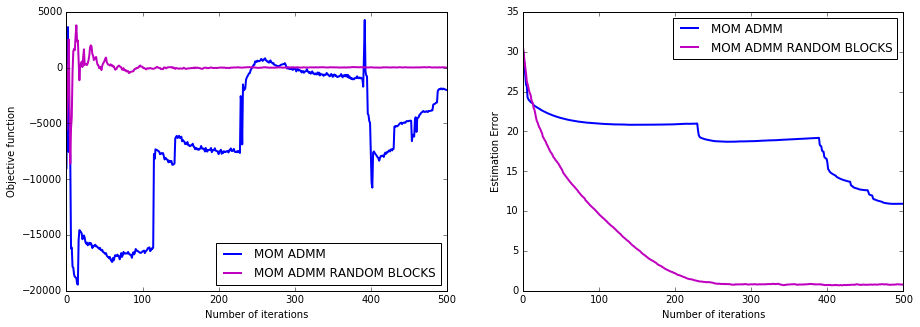

In [60]:
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, np.array(mom_obj_ADMM), 'b', linewidth = 2, label = 'MOM ADMM')
plt.plot(t, np.array(mom_obj_ADMM_random_blocks), 'm', linewidth = 2, label = 'MOM ADMM RANDOM BLOCKS')

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=4, fancybox=True, shadow=True)
plt.xlabel('Number of iterations')
plt.ylabel('Objective function')
plt.legend(loc=4)
#plt.ylim(-100, 100)
plt.subplot(122)
plt.plot(t, np.array(mom_error_ADMM), 'b', linewidth = 2, label = 'MOM ADMM')
plt.plot(t, np.array(mom_error_ADMM_random_blocks), 'm', linewidth = 2, label = 'MOM ADMM RANDOM BLOCKS')
#plt.plot(t, np.array(mom_error_CCD),'k',  linewidth = 2, label = 'CCD ADMM')
plt.legend(loc=1)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=4, fancybox=True, shadow=True)
plt.xlabel('Number of iterations')
plt.ylabel('Estimation Error')
#plt.subplot(133)
#plt.stem(beta_0, markerfmt='ro', label='true')
#plt.stem(mom_x_ADMM, markerfmt='b>', label = 'MOM ADMM')
#plt.stem(mom_x_ADMM_random_blocks, markerfmt='m<', label = 'MOM ADMM RANDOM BLOCKS')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4, fancybox=True, shadow=True)
#plt.legend(loc=2)
#plt.ylim(0, 100)
titre = 'N{}-d{}-s{}-sigma{}-K{}-RANDOM-BLOCKS.png'.format(n_samples, n_features, sparsity, sigma, K)
plt.savefig(titre)

In [90]:
error_ADMM, obj_ADMM, x_ADMM = MOM_LASSO.ADMM(X, y, beta_0, max_iter, lamda)

Lauching ADMM solver...
iter= 0, estimation error ADMM = 31.622783
iter= 100, estimation error ADMM = 3.617533
iter= 200, estimation error ADMM = 1.506724
iter= 300, estimation error ADMM = 1.507269
iter= 400, estimation error ADMM = 1.511977


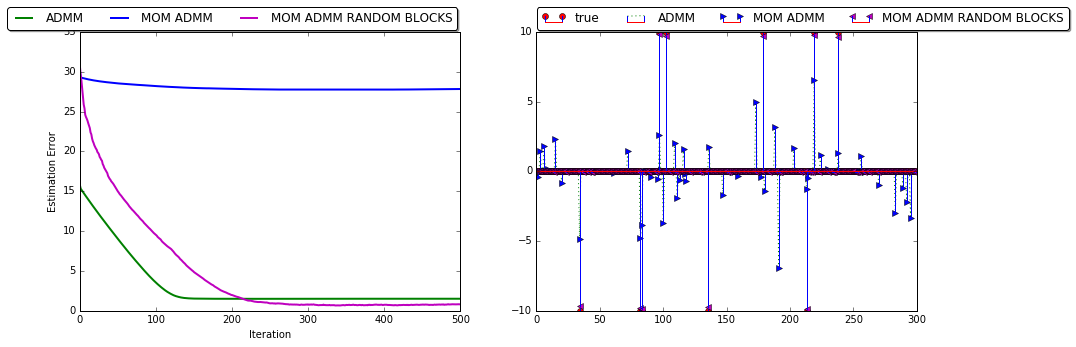

In [91]:
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, np.array(error_ADMM), 'g', linewidth = 2, label = 'ADMM')
plt.plot(t, np.array(mom_error_ADMM), 'b', linewidth = 2, label = 'MOM ADMM')
plt.plot(t, np.array(mom_error_ADMM_random_blocks), 'm', linewidth = 2, label = 'MOM ADMM RANDOM BLOCKS')
#plt.plot(t, np.array(mom_error_CCD),'k',  linewidth = 2, label = 'CCD ADMM')
plt.legend(loc='upper center', bbox_to_anchor=(0.4, 1.11), ncol=4, fancybox=True, shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.subplot(122)
plt.stem(beta_0, markerfmt='ro', label='true')
plt.stem(mom_x_ADMM, markerfmt='g:', label = 'ADMM')
plt.stem(mom_x_ADMM, markerfmt='b>', label = 'MOM ADMM')
plt.stem(mom_x_ADMM_random_blocks, markerfmt='m<', label = 'MOM ADMM RANDOM BLOCKS')
plt.legend(loc='upper center', bbox_to_anchor=(0.7, 1.11), ncol=4, fancybox=True, shadow=True)
#plt.legend(loc=2)
#plt.ylim(0, 100)
titre = 'comparison-N{}-d{}-s{}-sigma{}-K{}-RANDOM-BLOCKS.png'.format(n_samples, n_features, sparsity, sigma, K)
plt.savefig(titre)

In [14]:
from collections import defaultdict
def OUTLIERS_IMPORTANCE(list_ind_selected):
    dict_outliers_importance = defaultdict(int)
    for li in list_ind_selected:
        for ele in li:
            dict_outliers_importance[ele] += 1
    return dict_outliers_importance          

In [15]:
dict_outliers_importance = OUTLIERS_IMPORTANCE(list_ind_selected)

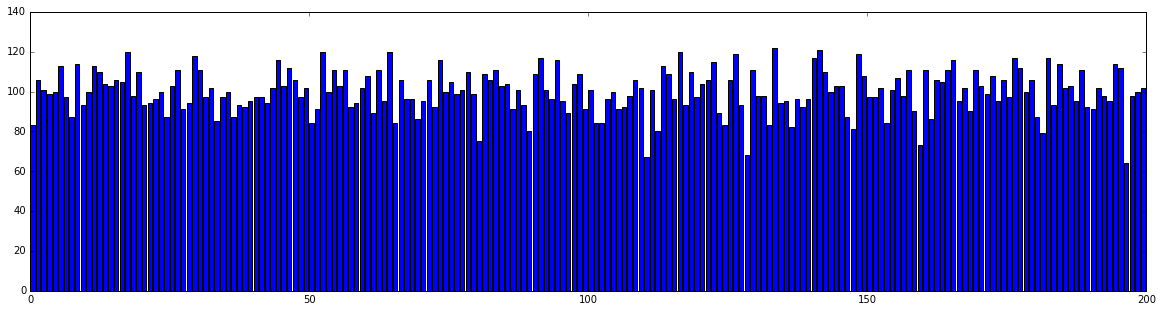

In [16]:
plt.figure(figsize = (20, 5))
plt.bar(dict_outliers_importance.keys(), dict_outliers_importance.values())

plt.show()

## Construction of corrupted dataset

In [17]:
def data4(n_outliers, n_features):
    Y = 10000*np.ones(n_outliers)
    X = np.ones((n_outliers, n_features))
    return Y, X

In [40]:
np.random.seed(50)
n_features, sparsity = 300, 20
beta_0 = MOM_LASSO.beta_func(n_features, sparsity)
n_samples,  sigma = 200, 1
n_outliers = int(n_samples/50)
y, X = MOM_LASSO.data1(n_samples, beta_0,  sigma)
Y4, X4 = data4(n_outliers, n_features)
y, X = MOM_LASSO.data_merge(y, X, Y4, X4)
beta_0 = np.matrix(beta_0).T
y = np.matrix(y).T
X = np.matrix(X)
K, max_iter, lamda = 10, 5000, 1/sqrt(n_samples)

In [41]:
list_outliers = [i for i in np.arange(n_samples) if y[i] == 10000]

In [42]:
mom_error_ADMM_random_blocks, mom_obj_ADMM_random_blocks, mom_x_ADMM_random_blocks, list_ind_selected = MOM_ADMM_RANDOM_BLOCKS(X, y, beta_0, K, max_iter, lamda)
mom_error_ADMM, mom_obj_ADMM, mom_x_ADMM = MOM_LASSO.MOM_ADMM(X, y,beta_0, K, max_iter, lamda)

Lauching MOM-ADMM-RANDOM-BLOCKS solver...
iter= 0, estimation error MOM ADMM RANDOM BLOCKS = 31.622783
iter= 100, estimation error MOM ADMM RANDOM BLOCKS = 374.737595
iter= 200, estimation error MOM ADMM RANDOM BLOCKS = 346.414079
iter= 300, estimation error MOM ADMM RANDOM BLOCKS = 325.180896
iter= 400, estimation error MOM ADMM RANDOM BLOCKS = 305.274529
iter= 500, estimation error MOM ADMM RANDOM BLOCKS = 286.072780
iter= 600, estimation error MOM ADMM RANDOM BLOCKS = 267.328411
iter= 700, estimation error MOM ADMM RANDOM BLOCKS = 248.638224
iter= 800, estimation error MOM ADMM RANDOM BLOCKS = 230.365877
iter= 900, estimation error MOM ADMM RANDOM BLOCKS = 212.420554
iter= 1000, estimation error MOM ADMM RANDOM BLOCKS = 194.896339
iter= 1100, estimation error MOM ADMM RANDOM BLOCKS = 177.516560
iter= 1200, estimation error MOM ADMM RANDOM BLOCKS = 160.418291
iter= 1300, estimation error MOM ADMM RANDOM BLOCKS = 143.626640
iter= 1400, estimation error MOM ADMM RANDOM BLOCKS = 126.878

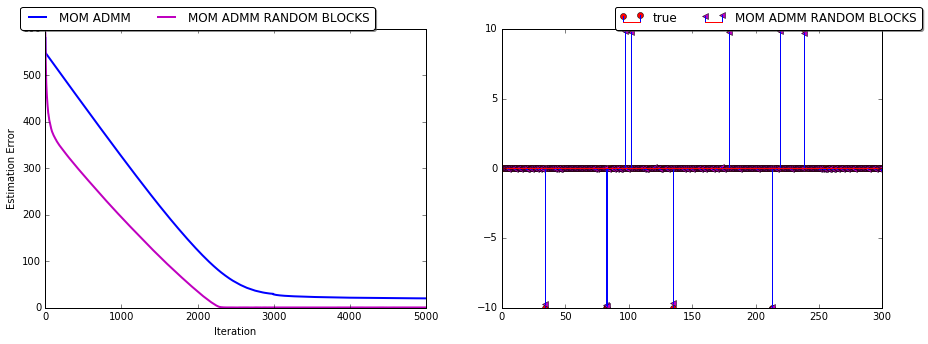

In [43]:
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, np.array(mom_error_ADMM), 'b', linewidth = 2, label = 'MOM ADMM')
plt.plot(t, np.array(mom_error_ADMM_random_blocks), 'm', linewidth = 2, label = 'MOM ADMM RANDOM BLOCKS')
plt.legend(loc='upper center', bbox_to_anchor=(0.4, 1.1), ncol=4, fancybox=True, shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.subplot(122)
plt.stem(beta_0, markerfmt='ro', label='true')
plt.stem(mom_x_ADMM_random_blocks, markerfmt='m<', label = 'MOM ADMM RANDOM BLOCKS')
plt.legend(loc='upper center', bbox_to_anchor=(0.7, 1.1), ncol=4, fancybox=True, shadow=True)
#plt.legend(loc=2)
#plt.ylim(0, 100)
titre = 'comparison-MOM-N{}-d{}-s{}-sigma{}-K{}-O{}-RANDOM-BLOCKS.png'.format(n_samples, n_features, sparsity, sigma, K, n_outliers)
#plt.savefig(titre)

In [44]:
dict_outliers_importance = OUTLIERS_IMPORTANCE(list_ind_selected)

In [45]:
val_outliers = []
for ele in list_outliers:
    val_outliers.append(dict_outliers_importance[ele])

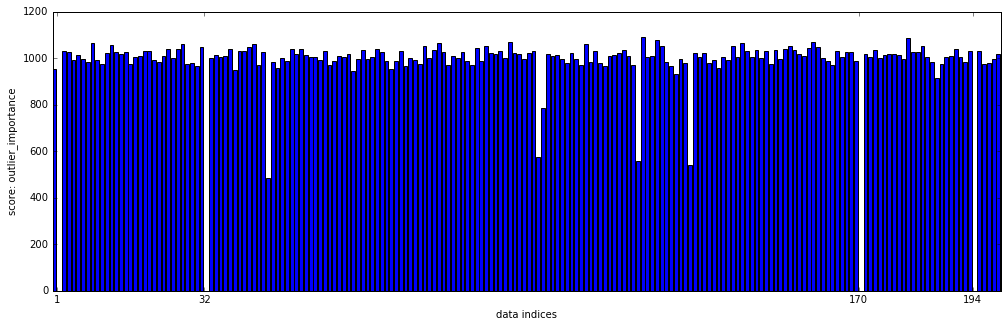

In [51]:
plt.figure(figsize = (17, 5))
plt.bar(dict_outliers_importance.keys(), dict_outliers_importance.values())
plt.bar(list_outliers, val_outliers, color='red')
plt.xticks(list_outliers)
plt.xlim(0, 200)
plt.xlabel('data indices')
plt.ylabel('score: outlier_importance')
#plt.show()
titre = 'OUTLIERS-IMPORTANCE-N{}-d{}-s{}-sigma{}-K{}-RANDOM-BLOCKS.png'.format(n_samples, n_features, sparsity, sigma, K)
plt.savefig(titre)